# Campeonato Brasileiro Série B 2020

A Série B do Campeonato Brasileiro de Futebol de 2020 foi uma competição de futebol realizada no Brasil, equivalente à segunda divisão. Foi disputada por 20 clubes, dos quais os quatro primeiros colocados tiveram acesso a Série A de 2021 e os quatro últimos foram rebaixados a Série C de 2021.

A ideia é tirar alguns insights a partir apenas da tabela final do campeonato.

In [4]:
# bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import math
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

In [5]:
# importar dados

df = pd.read_csv('data/tabela_campeonato.csv', sep=';', encoding='latin 1')
df.head(2)

,posicao,pontos,jogos,vitorias,empates,derrotas,gols_pro,gols_contra,saldo_gols,aproveitamento,variacao_posicao,ultimos_jogos,time.time_id,time.nome_popular,time.sigla,time.escudo
0,1,73,38,20,13,5,42,21,21,64.0,1,"['v', 'e', 'v', 'd', 'v']",5,Chapecoense,CHA,https://apifutebol.s3.sa-east-1.amazonaws.com/...
1,2,73,38,20,13,5,43,23,20,64.0,-1,"['e', 'e', 'e', 'e', 'v']",33,América-MG,AMG,https://apifutebol.s3.sa-east-1.amazonaws.com/...


**Aproveitamento** é a quantidade de pontos que uma equipe fez, dividido pelo máximo de pontos possíveis naquela rodada do campeonato.

Por exemplo, na primeira rodada do campeonato uma equipe venceu e ganhou 3 pontos, de 3 possíveis: 3 / 3 = 1, ela obteve 100% de aproveitamento. Se empatou, ganhou 1 de 3 possíveis, logo, 1 / 3 = 0,33 = 33%.

Ao final do campeonato, com 38 rodadas disputadas, são 114 pontos possíveis, ou seja, basta dividir quantos pontos uma equipe fez por esse valor.

In [6]:
df.describe()

# sem dados ausentes
# sem necessidade de conversões

,posicao,pontos,jogos,vitorias,empates,derrotas,gols_pro,gols_contra,saldo_gols,aproveitamento,variacao_posicao,time.time_id
count,20.00000,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000
mean,10.50000,51.350000,38.0,13.650000,10.700000,13.650000,41.200000,41.200000,0.000000,45.300000,0.000000,74.85000
std,5.91608,11.590718,0.0,3.869925,2.735729,4.463595,7.997368,9.484614,13.090776,10.173185,1.025978,55.68263
min,1.00000,29.000000,38.0,7.000000,6.000000,5.000000,26.000000,21.000000,-32.000000,25.400000,-3.000000,5.00000
25%,5.75000,45.500000,38.0,10.750000,9.000000,11.000000,35.000000,36.250000,-7.250000,39.950000,-0.250000,41.50000
50%,10.50000,50.500000,38.0,14.500000,10.000000,13.500000,41.500000,42.000000,0.500000,46.900000,0.000000,63.50000
75%,15.25000,57.250000,38.0,16.250000,13.000000,16.000000,48.000000,48.250000,8.500000,50.225000,1.000000,96.75000
max,20.00000,73.000000,38.0,20.000000,16.000000,23.000000,54.000000,60.000000,21.000000,64.000000,1.000000,205.00000


In [7]:
# Eliminar as colunas que não serão utilizadas

df.drop(['variacao_posicao', 'ultimos_jogos', 'time.sigla', 'time.escudo'], axis=1, inplace=True)

In [8]:
# Alterar índice da tabela para a posição do time

df.set_index('posicao', inplace=True)

In [9]:
df

,pontos,jogos,vitorias,empates,derrotas,gols_pro,gols_contra,saldo_gols,aproveitamento,time.time_id,time.nome_popular
posicao,,,,,,,,,,,
1,73,38,20,13,5,42,21,21,64.0,5,Chapecoense
2,73,38,20,13,5,43,23,20,64.0,33,América-MG
3,61,38,17,10,11,52,42,10,53.5,43,Juventude
4,61,38,17,10,11,48,40,8,53.5,204,Cuiabá
5,58,38,16,10,12,50,37,13,50.9,95,CSA
6,57,38,17,6,15,50,38,12,50.0,120,Sampaio Corrêa
7,57,38,16,9,13,54,49,5,50.0,61,Ponte Preta
8,57,38,15,12,11,40,34,6,50.0,117,Operário-PR
9,55,38,16,7,15,45,49,-4,48.2,6,Avaí


In [10]:
# Times

df['time.nome_popular']

posicao
1           Chapecoense
2            América-MG
3             Juventude
4                Cuiabá
5                   CSA
6        Sampaio Corrêa
7           Ponte Preta
8           Operário-PR
9                  Avaí
10                  CRB
11             Cruzeiro
12    Brasil de Pelotas
13              Guarani
14              Vitória
15            Confiança
16              Náutico
17          Figueirense
18               Paraná
19          Botafogo-SP
20                Oeste
Name: time.nome_popular, dtype: object

#### Os jogos

Como foram os resultados dos jogos.

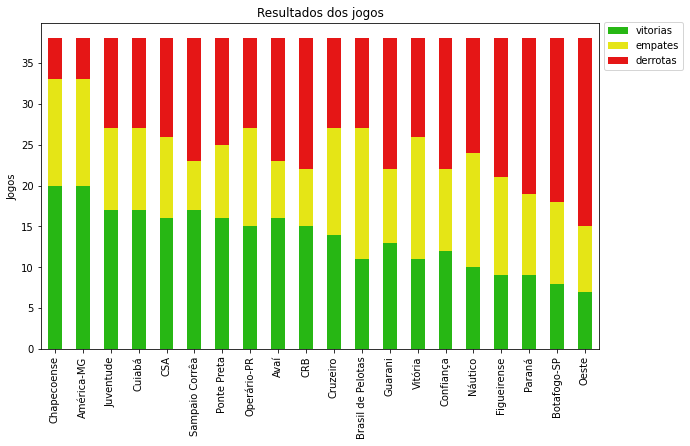

In [11]:
colors = ['#27b714', '#e5e516', '#e51616']

ax = df.plot(kind='bar', y=['vitorias', 'empates', 'derrotas'], x='time.nome_popular', 
             stacked=True, figsize=(10, 6), color = colors);

ax.set(xlabel='', ylabel='Jogos', title='Resultados dos jogos')
plt.legend(loc="lower left",bbox_to_anchor=(1.0, 0.84));
plt.show();

#### Os 10 maiores pontuadores

Os 10 times com mais pontos no campeonato

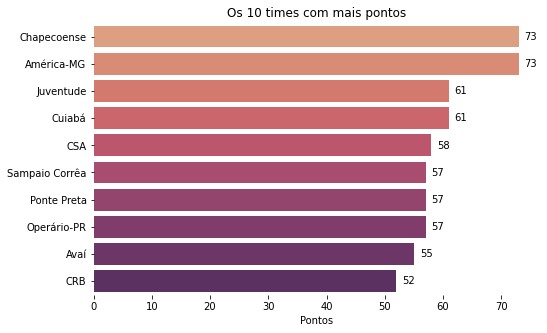

In [12]:
f, ax = plt.subplots(figsize=(8, 5))
ax = sns.barplot(data=df.head(10), y='time.nome_popular', x='pontos', palette="flare");
ax.set(xlabel='Pontos', ylabel='', title='Os 10 times com mais pontos')

for p in ax.patches:
    width = p.get_width()
    ax.text(width + 1, p.get_y() + p.get_height() / 2, '{:1.0f}'.format(width), ha = 'left', va = 'center') 

sns.despine(left=True, bottom=True);

#### Os 10 maiores vencedores

As 10 equipes que mais venceram no campeonato

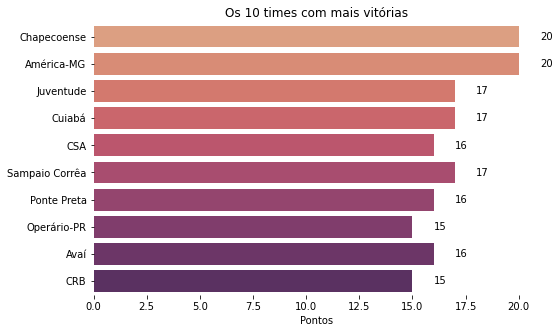

In [21]:
f, ax = plt.subplots(figsize=(8, 5))
ax = sns.barplot(data=df.head(10), y='time.nome_popular', x='vitorias', palette="flare");
ax.set(xlabel='Pontos', ylabel='', title='Os 10 times com mais vitórias')

for p in ax.patches:
    width = p.get_width()
    ax.text(width + 1, p.get_y() + p.get_height() / 2, '{:1.0f}'.format(width), ha = 'left', va = 'center') 

sns.despine(left=True, bottom=True);

#### Gols marcados

As 10 equipes com mais gols marcados

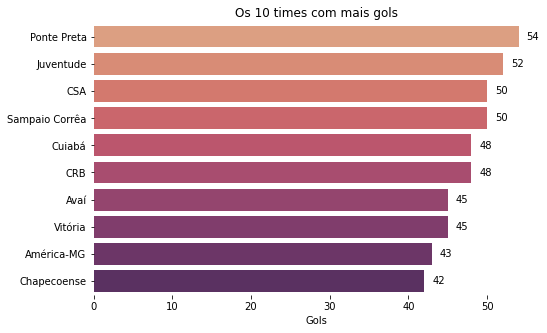

In [13]:
f, ax = plt.subplots(figsize=(8, 5))
ax = sns.barplot(data=df.sort_values('gols_pro', ascending=False).head(10), y='time.nome_popular', x='gols_pro', palette="flare");
ax.set(xlabel='Gols', ylabel='', title='Os 10 times com mais gols')

for p in ax.patches:
    width = p.get_width()
    ax.text(width + 1, p.get_y() + p.get_height() / 2, '{:1.0f}'.format(width), ha = 'left', va = 'center') 

sns.despine(left=True, bottom=True);

#### Gols sofridos

As 10 equipes que menos sofreram gols no campeonato

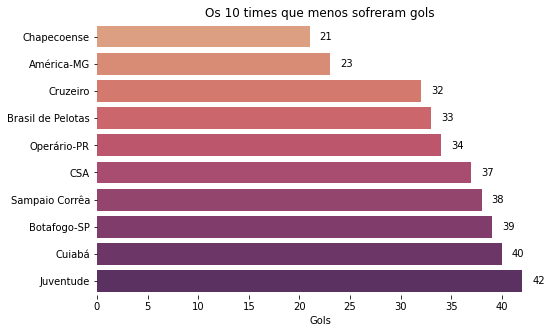

In [14]:
f, ax = plt.subplots(figsize=(8, 5))
ax = sns.barplot(data=df.sort_values('gols_contra', ascending=True).head(10), y='time.nome_popular', x='gols_contra', palette="flare");
ax.set(xlabel='Gols', ylabel='', title='Os 10 times que menos sofreram gols')

for p in ax.patches:
    width = p.get_width()
    ax.text(width + 1, p.get_y() + p.get_height() / 2, '{:1.0f}'.format(width), ha = 'left', va = 'center')

sns.despine(left=True, bottom=True);

---

## Análises de variáveis

Vamos selecionar alguns pares de variáveis, para entendermos as correlações entre elas.

Será fixado o valor de significância em 5% (a = 0,05), sendo assim, o coeficiente de correlação populacional é significativo, quando realmente não é em 5% das vezes.

Abaixo algumas funções que calculam e mostram os gráficos com os resultados.

In [15]:
###################

def grafico_pontos(df, rotulo_x, rotulo_y, titulo):
    """
    Mostra o gráfico com o valor do coeficiente r, além da reta de regressão
    
    A correlação (resultado de np.corrcoef()) é a correlação de Pearson, onde retorna um valor entre -1 e 1.
    Quanto mais próximo de -1, a correlação é negativa (quando uma variável aumenta, a outra diminui de valor)
    Quanto mais próximo de 1, a correlação é positiva (quando uma variável aumenta, a outra também)
    """
    coef = np.corrcoef(df[rotulo_x], df[rotulo_y])
    
    # Reta de regressão
    _x = df.loc[:, rotulo_x].values.reshape(-1, 1)
    _y = df.loc[:, rotulo_y].values.reshape(-1, 1)
    lr = LinearRegression()
    lr.fit(_x, _y)
    y_pred = lr.predict(_x)
    #reta = 'y^ = ' + str(lr.intercept_[0]) + str(lr.coef_[0]) + 'x'
    
    # Obter coeficiente de determinação r²
    r2 = lr.score(_x, _y)
    
    # Gráficos
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.scatter(x=df[rotulo_x], y= df[rotulo_y] ,color='blue')
    ax.plot(df[rotulo_x], y_pred, color = '#F2929F')
    plt.suptitle(titulo, y=1.05, fontsize=18)
    plt.title("Correlação: " + 
              "{:.3f}".format(coef[0,1]) + " | Determinação: {:.2f}".format(r2) +
              "\n Reta: y^ = {:.3f} + {:.3f} x".format(lr.intercept_[0], lr.coef_[0][0])
             )
    ax.set(xlabel=rotulo_x, ylabel=rotulo_y)
    plt.show()

###################

def testar_coeficiente_r(df, x, y, alpha):
    """
    Verifica se o coeficiente r é significativo
    
    Se |r| for maior que o valor crítico, então há evidência suficiente para decidir que a correlação é significativa. 
    Caso contrário, não há evidência suficiente para dizer que a correlação é significativa.
    """
    r = abs(np.corrcoef(df[x], df[y])[0][1])
    d_freedom = len(df) - 2
    critical_t = stats.t.ppf(alpha / 2, d_freedom)
    critical_r = np.sqrt( (critical_t ** 2) / ((critical_t ** 2) + d_freedom))
    if(r > critical_r):
        return {'r': round(r, 4), 'r_critico': round(critical_r, 4), 'alpha': alpha, 'significativo': True}
    else:
        return {'r': round(r, 4), 'r_critico': round(critical_r, 4), 'alpha': alpha, 'significativo': False}

###################

### Vitórias e pontos

Selecionando as variáveis `vitórias` e `pontos`.

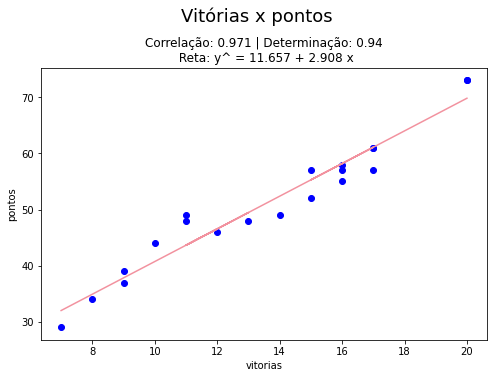

In [18]:
grafico_pontos(df, 'vitorias', 'pontos', 'Vitórias x pontos')

In [17]:
testar_coeficiente_r(df, 'vitorias', 'pontos', 0.05)

{'r': 0.9709, 'r_critico': 0.4438, 'alpha': 0.05, 'significativo': True}

A correlação linear entre x e y é de 0,971 e x explica 94% da variância em y (coeficiente de determinação), o que pode ser considerado alto.

Há evidência suficiente, ao nível de significância de 5%, para concluir que há uma correlação linear entre o número de vitórias e a quantidade de pontos.

Aqui meramente constatamos uma obviedade: quanto mais jogos um time vence, mais pontos ele acumula.

### Vitórias e gols pró

Selecionando as variáveis `vitórias` e `gols_pro`.

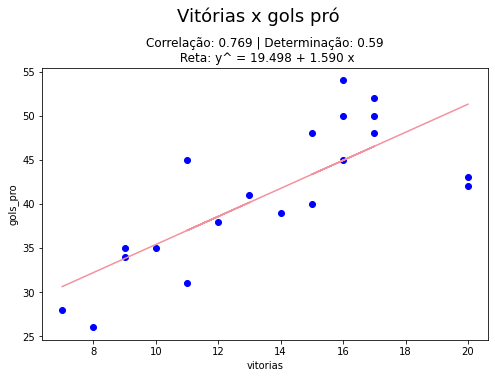

In [19]:
grafico_pontos(df, 'vitorias', 'gols_pro', 'Vitórias x gols pró')

In [20]:
testar_coeficiente_r(df, 'vitorias', 'gols_pro', 0.05)

{'r': 0.7693, 'r_critico': 0.4438, 'alpha': 0.05, 'significativo': True}

A correlação entre x e y é de 0,769 e x explica 59% da variância em y (coeficiente de determinação), o que pode ser considerado baixo.

Há evidência suficiente, ao nível de significância de 5%, para concluir que há uma correlação linear entre o número de vitórias e a quantidade de gols.

Aqui se pode dizer que mesmo havendo uma correlação entre as vitórias e a quantidade de gols marcados, ela não é tão alta assim. E faz sentido. Pegando a Chapecoense como exemplo, a equipe catarinense foi a que mais venceu jogos (junto com o Coelho mineiro), a que menos sofreu gols, mas é apenas o 10º melhor ataque.

Claro que isso diz respeito a uma única equipe, para reforçar o argumento, podemos adicionar mais um dado: a média de gols geral.

In [26]:
numero_rodadas = 38
jogos_por_rodada = 10

In [27]:
sum(df['gols_pro']) / (numero_rodadas * jogos_por_rodada)

2.168421052631579

Em 380 jogos, a média foi de 2,17 gols por jogo, o que não é muito.

Agora vamos adicionar mais um outro olhar, sobre as médias de gols feitos de cada equipe.

In [31]:
df['gols_pro_media'] = df['gols_pro'] / 38

In [36]:
df[['time.nome_popular', 'pontos', 'gols_pro_media']].sort_values(by='gols_pro_media', ascending=False)

,time.nome_popular,pontos,gols_pro_media
posicao,,,
7,Ponte Preta,57,1.421053
3,Juventude,61,1.368421
5,CSA,58,1.315789
6,Sampaio Corrêa,57,1.315789
4,Cuiabá,61,1.263158
10,CRB,52,1.263158
9,Avaí,55,1.184211
14,Vitória,48,1.184211
2,América-MG,73,1.131579


Olhando as médias de gol por jogo, na parte de cima da tabela, as equipes com maior média, não são necessariamente as que mais pontuaram. E olhando no final da tabela, temos um intruso, o Brasil que ficou em 12º e teve o terceiro pior ataque.

### Pontos x Gols contra

Selecionando as variáveis `pontos` e `gols_contra`

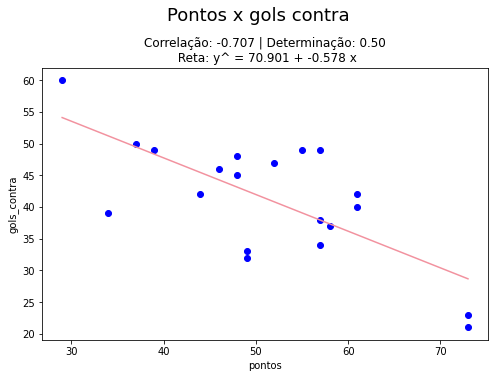

In [47]:
grafico_pontos(df, 'pontos', 'gols_contra', 'Pontos x gols contra')

In [48]:
testar_coeficiente_r(df, 'pontos', 'gols_contra', 0.05)

{'r': 0.7068, 'r_critico': 0.4438, 'alpha': 0.05, 'significativo': True}

A correlação entre x e y é de -0,7 e x explica 50% da variância em y (coeficiente de determinação), o que pode ser considerado baixo.

Há evidência suficiente, ao nível de significância de 5%, para concluir que há uma correlação linear entre o número de pontos e a quantidade de gols sofridos.

Aqui a correlação é negativa, ou seja, quanto mais pontos conquistados, menor a quantidade de gols sofridos. Apesar da correlação linear não ser tão alta, só de olhar o gráfico é possível perceber essa tendência. É possível perceber que os times com mais pontos, tiveram as melhores defesas, e o time com menos pontos, o com mais sofreu gols.